In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('sample1.txt', sep='\s+')
df.atom_list = df.atom_list.apply(lambda x: list(map(int, x.split(','))))
atom_dict = {
    12: 'Mg',
    13: 'Al',
    20: 'Ca',
    22: 'Ti',
    23: 'V',
    24: 'Cr',
    25: 'Mn',
    26: 'Fe',
    27: 'Co',
    28: 'Ni',
    29: 'Cu',
    30: 'Zn',
    38: 'Sr',
    56: 'Ba',
}
for an, name in atom_dict.items():
    df[name] = df.atom_list.apply(lambda x: x.count(an) / len(x))
X = df[atom_dict.values()]
y = df.target

In [2]:
from sklearn.model_selection import train_test_split
def get_correctness(clf, X, y, n=100, ts=0.2):
    correctness = []
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts)
        clf.fit(X_train, y_train)
        correctness.append((clf.predict(X_test) == y_test).mean())
    return np.mean(correctness)

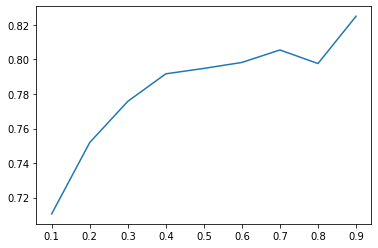

In [3]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, max_depth=10)
ts = []
co = []
for i in range(9):
    ts.append(i / 10 + 0.1)
    co.append(get_correctness(clf, X, y, ts=1-ts[-1]))
import matplotlib.pyplot as plt
plt.plot(ts, co)